<img src="https://github.com/djp840/MSDS_422_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS422 Assignment 04:

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### Data Dictionary Housing Values in Suburbs of Boston

The Boston data frame has 506 rows and 14 columns.<br>
The <b>medv variable</b> is the target variable.<br>
<br>
<b>crim</b><br>
per capita crime rate by town.<br>
<br>
<b>zn</b><br>
proportion of residential land zoned for lots over 25,000 sq.ft.<br>
<br>
<b>inducrims</b><br>
proportion of non-retail business acres per town.<br>
<br>
<b>chas</b><br>
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br>
<br>
<b>nox</b><br>
nitrogen oxides concentration (parts per 10 million).<br>
<br>
<b>rm</b><br>
average number of rooms per dwelling.<br>
<br>
<b>age</b><br>
proportion of owner-occupied units built prior to 1940.<br>
<br>
<b>dis</b><br>
weighted mean of distances to five Boston employment centres.<br>
<br>
<b>rad</b><br>
index of accessibility to radial highways.<br>
<br>
<b>tax</b><br>
full-value property minus tax rate per ten thousand dollars<br>
<br>
<b>ptratio</b><br>
pupil-teacher ratio by town.<br>
<br>
<b>black</b><br>
1 Thousand(Bk - 0.63)^2" where Bk is the proportion of blacks by town.<br>
<br>
<b>lstat</b><br>
lower status of the population (percent).<br>
<br>
<b>medv</b><br>
median value of owner-occupied homes in $1000s.<br>
<br>
<br>
<b>Sources:</b><br>
Harrison, D. and Rubinfeld, D.L. 1978 Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.<br>
<br>
Belsley D.A., Kuh, E. and Welsch, R.E. 1980 Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.<br>

## Import packages 

In [1]:
import numpy as np
import pandas as pd
import os
import itertools
from math import sqrt
from scipy import stats as st
#import cvxopt

import sklearn 
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.model_selection import train_test_split

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import statsmodels.api as sm

from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [2]:
%matplotlib inline

In [3]:
np.set_printoptions(precision=4)

<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Mount Google Drive to Colab Enviorment

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Load Data (Local Directory)

In [6]:
boston_df=pd.read_csv('./data/MSDS422_boston.csv')

### Data Quality Review 

In [8]:
print("Shape:", boston_df.shape,"\n")
print("Variable Types:") 
print(boston_df.dtypes)

Shape: (506, 14) 

Variable Types:
neighborhood     object
crim            float64
zn              float64
indus           float64
chas              int64
nox             float64
rooms           float64
age             float64
dis             float64
rad               int64
tax               int64
ptratio         float64
lstat           float64
mv              float64
dtype: object


In [9]:
boston_df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


 <div class="alert alert-block alert-warning">
Dropping Neighborhood as it is non-numeric
 </div>

In [10]:
boston_df=boston_df.drop('neighborhood', 1)

## Exploritory Data Analysis (EDA) 

### Review Dataset for Missing Values

In [11]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row for each column number of records
</div> 

In [12]:
boston_df.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Review Dataset Distributions  Boxplot and Histograms

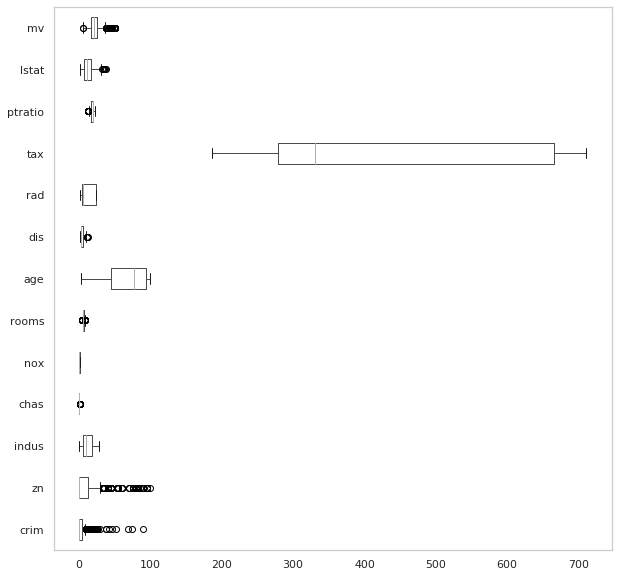

In [13]:
boston_df.boxplot(vert=False, figsize=(10,10), grid=False)

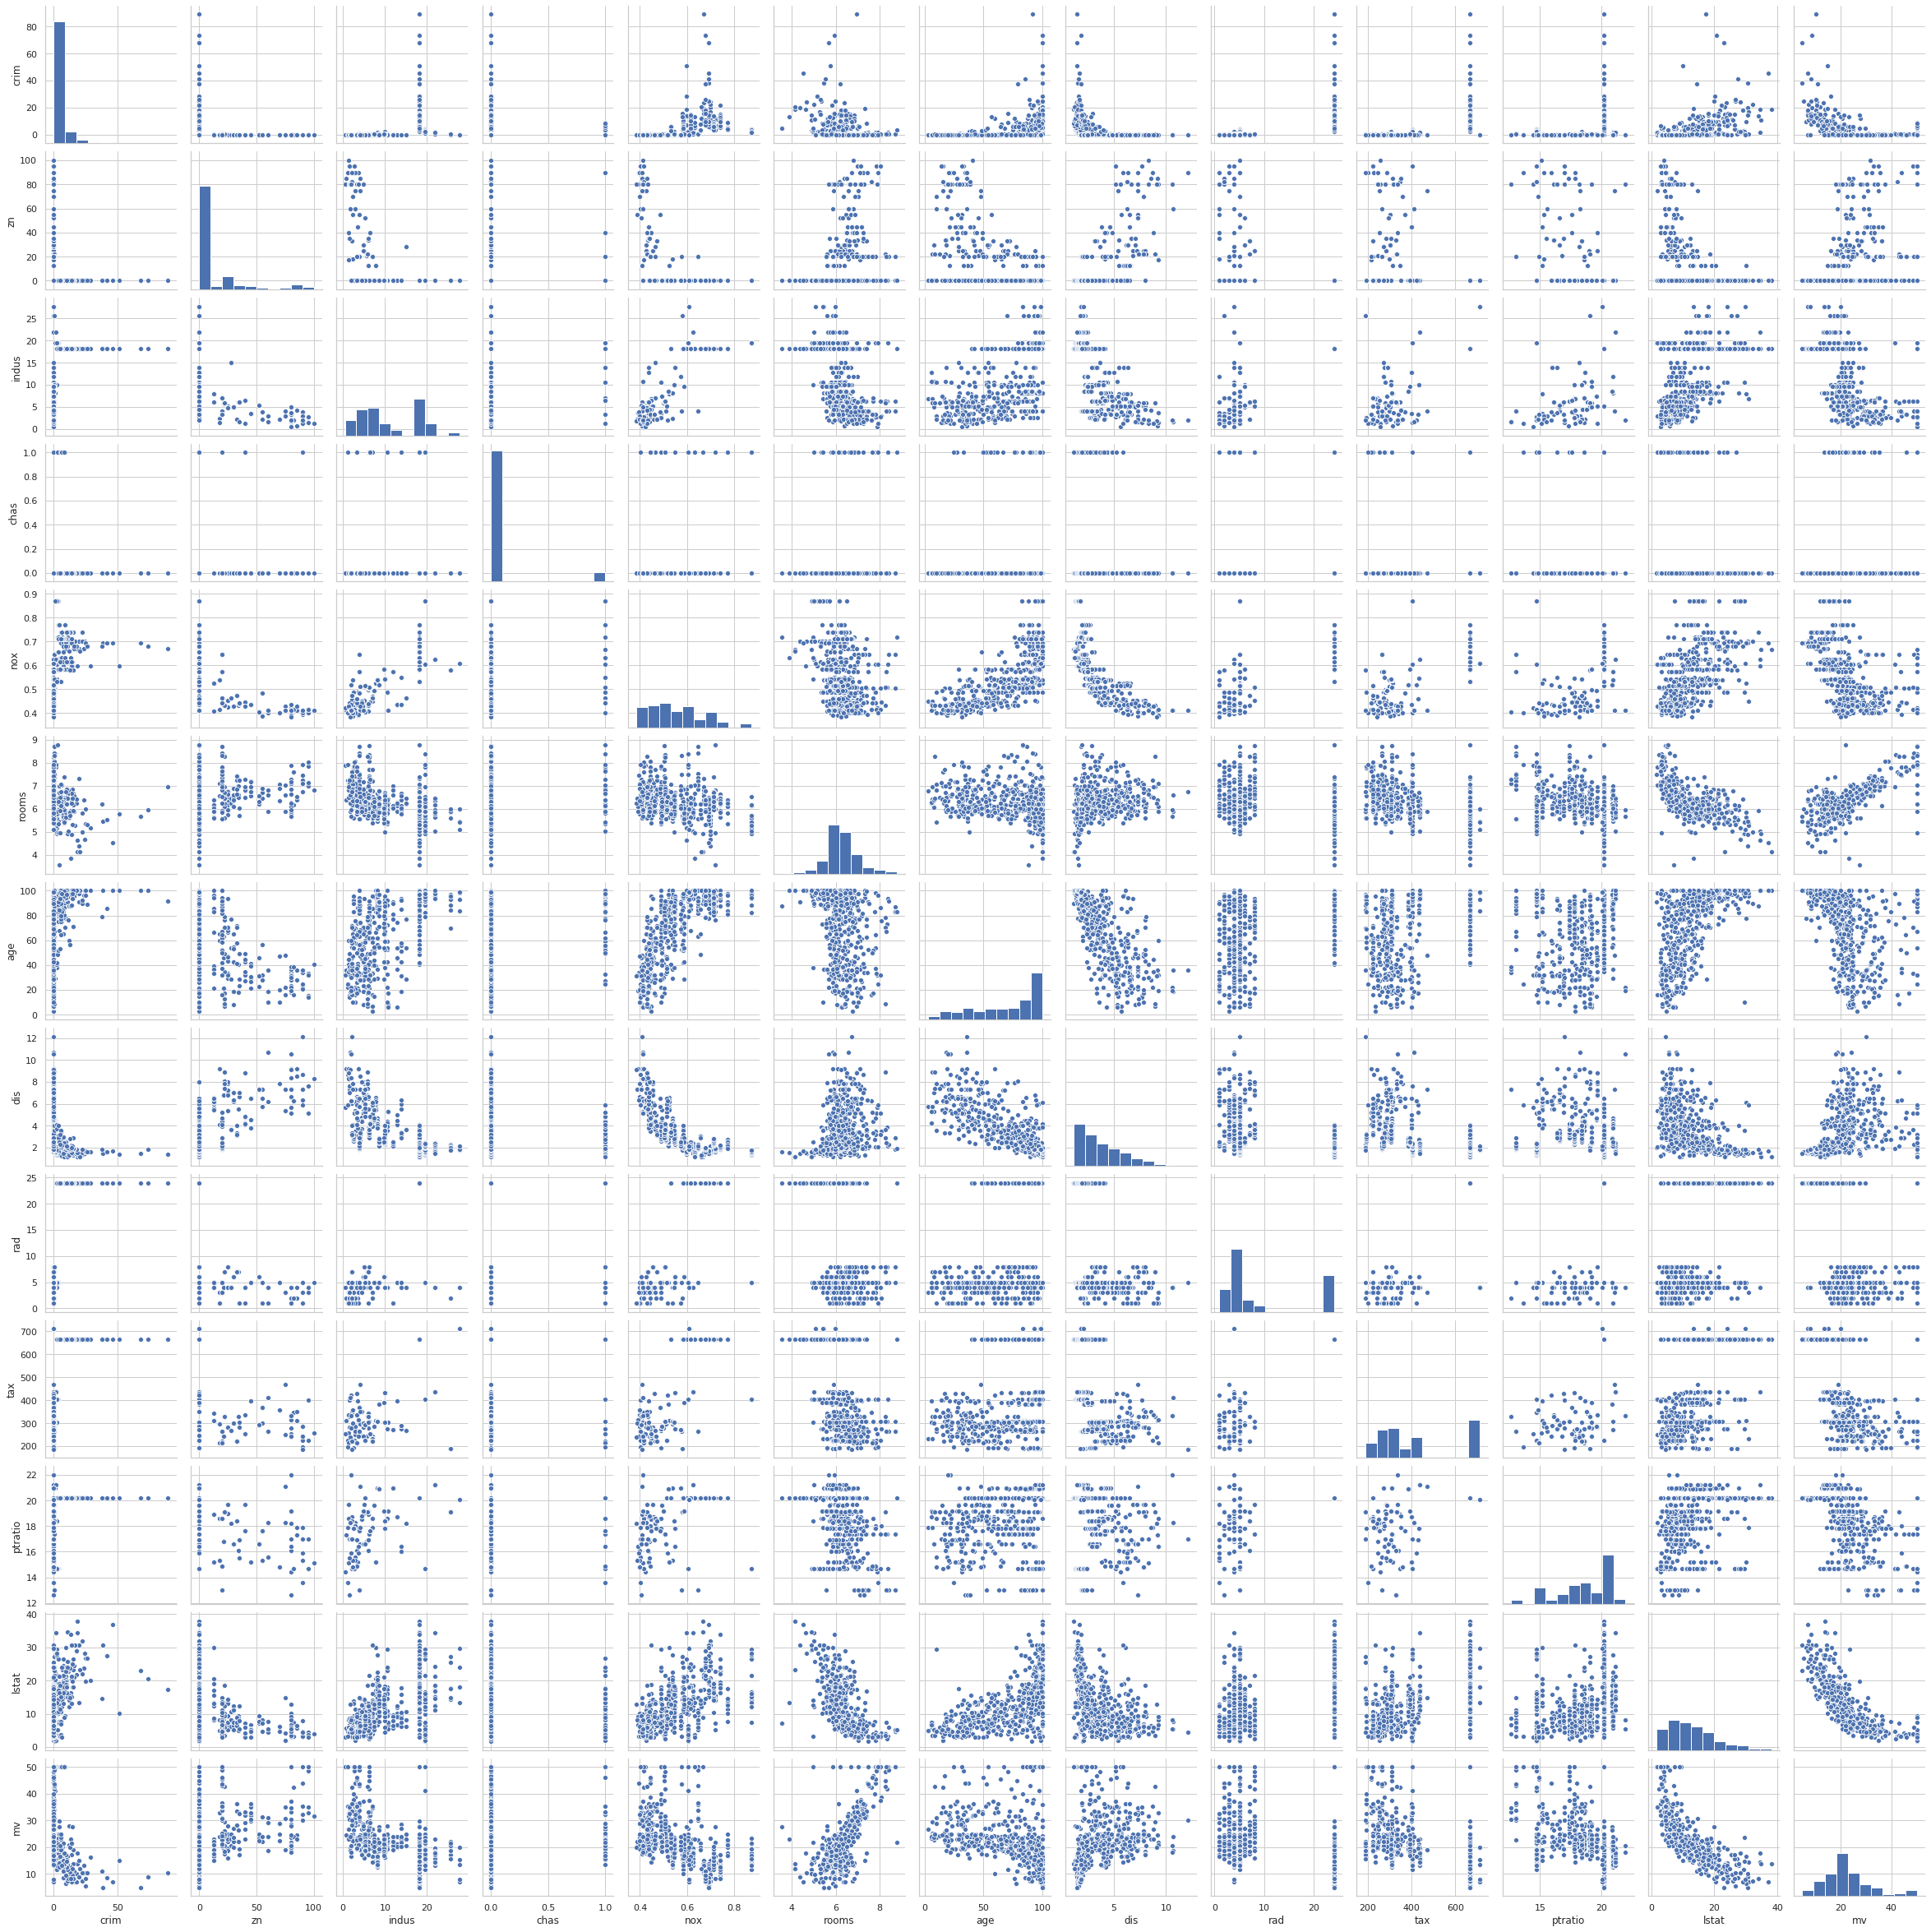

In [14]:
sns.pairplot(boston_df, diag_kind='hist')

## Preprocess Data for Analysis

#### Normalizing Variable Distributions with Log Transformation 

Analysis of linear relationships between variables can introduce "0" (zero) values, these have to be removed to be able to work with Log transformation (normalization) of the data

<div class="alert alert-block alert-info">
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
    </div>

y = (x**lmbda - 1) / lmbda,  for lmbda > 0<br>
    log(x),                  for lmbda = 0<br>

<b>boxcox</b> requires the input data to be positive. Sometimes a Box-Cox transformation provides a `shift parameter` to achieve this;<br> <b>boxcox</b> does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.

#### Create Dataframe with Target Variable

In [15]:
boston_df1=boston_df.copy()

In [16]:
columns = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
boston_Target = boston_df1.drop(columns=columns)

In [17]:
print(boston_Target.head())

     mv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [18]:
boston_Target.shape

(506, 1)

In [19]:
boston_df2=boston_df.apply(lambda x: x+.01)
boston_df2=boston_df2.transform(lambda x: st.boxcox(x)[0])

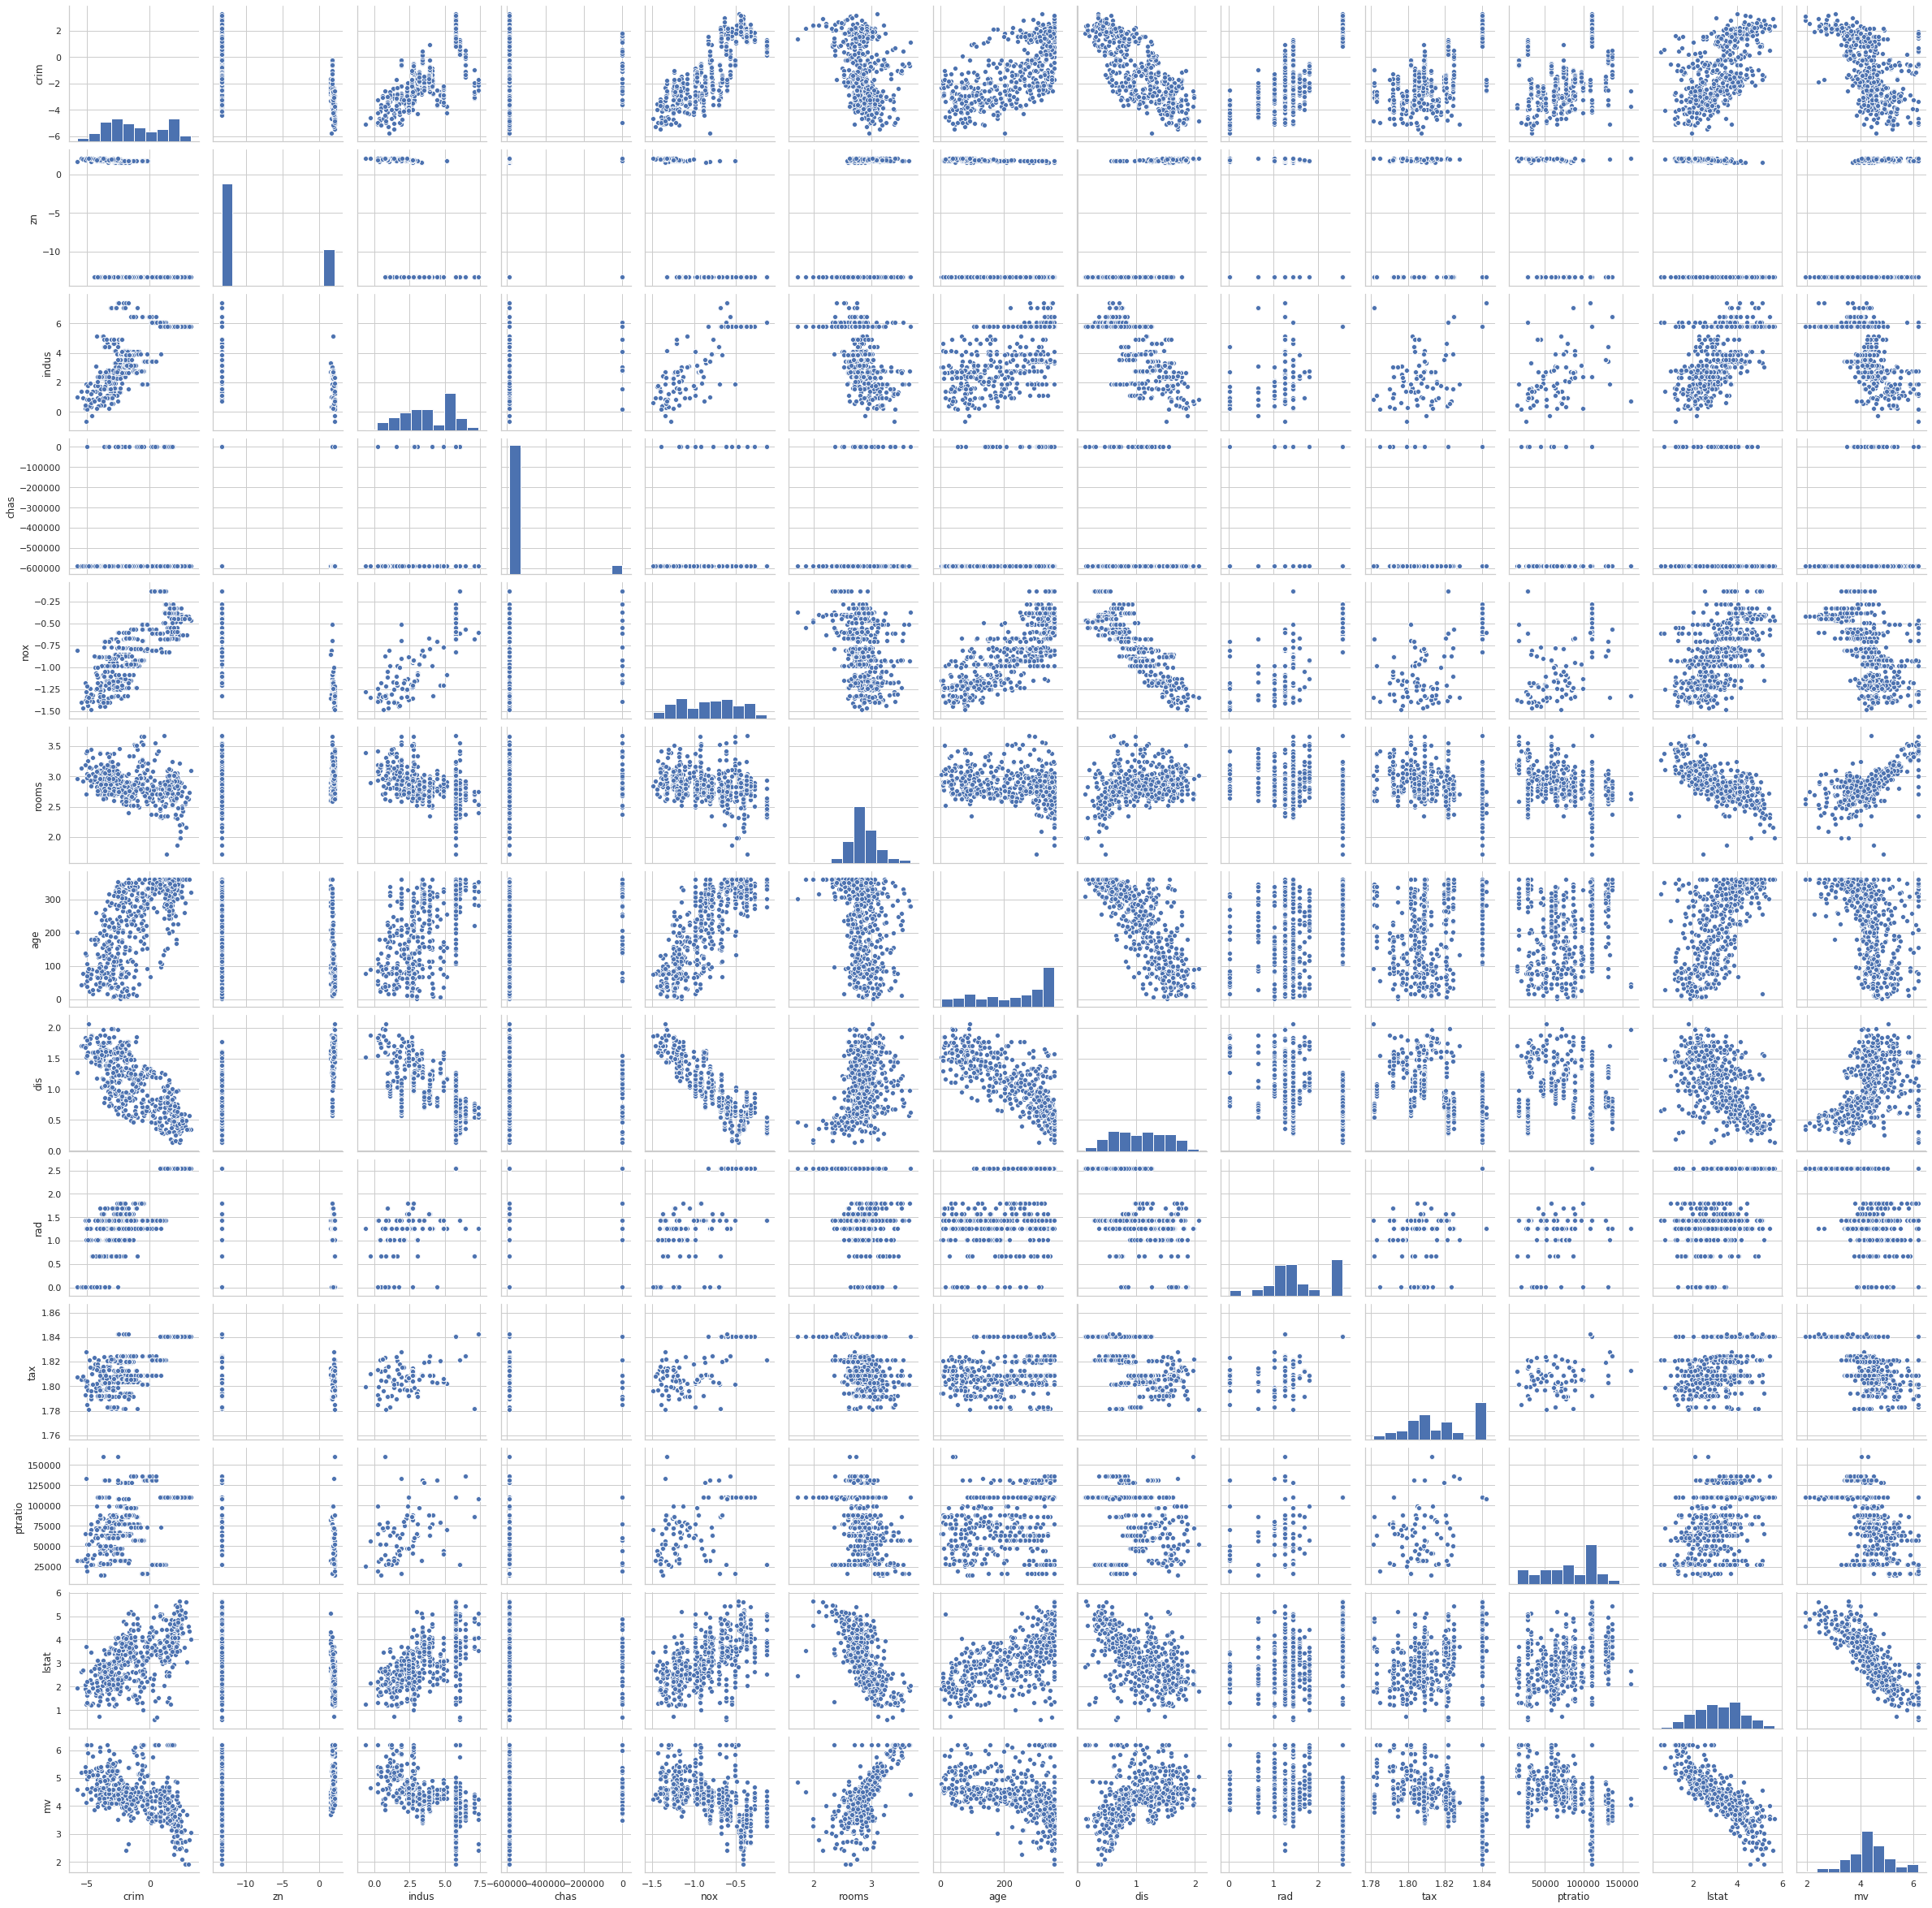

In [20]:
sns.pairplot(boston_df2, diag_kind='hist')

In [21]:
boston_df3=boston_df2.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d3539470>,
      dtype=object)

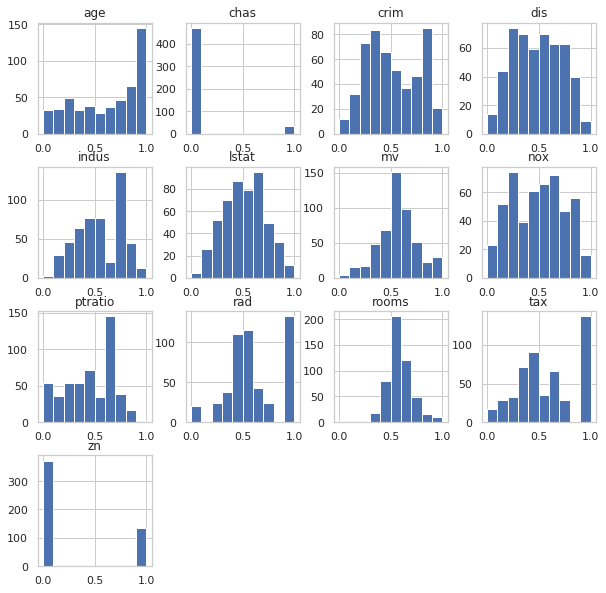

In [22]:
boston_df3.hist(figsize=(10,10))

#### Plot the distribution of the target variable mv (median value of owner-occupied homes in $1000s)

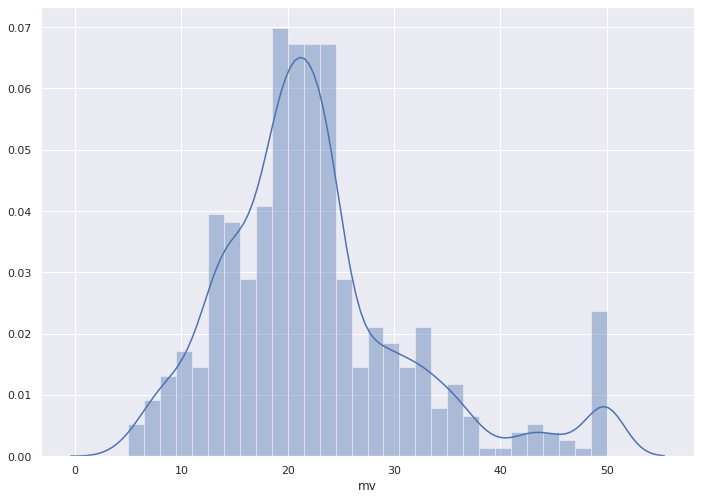

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_Target['mv'], bins=30)
plt.show()

In [24]:
boston_df3.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rooms      float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
lstat      float64
mv         float64
dtype: object

The <b>medv variable</b> is the target variable.<br>

In [25]:
cols = boston_df3.columns.tolist()
cols = cols[-1:] + cols[:-1]
boston_df4=boston_df3[cols]
boston_df4.describe(include="all")

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.566816,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794
std,0.184926,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469326,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902
50%,0.567460,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193
75%,0.644398,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-info">
    <b>Correlation matrix that measures the linear relationships</b><br> 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    </div>

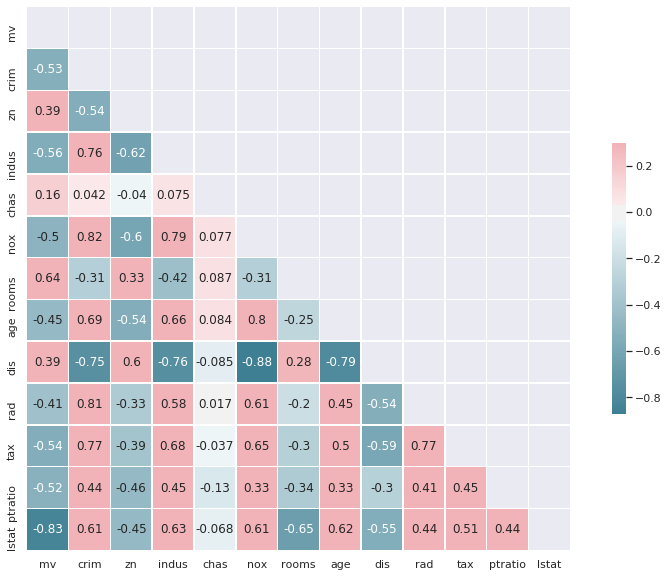

In [26]:
plt.figure(figsize=(15,10))
corr=boston_df4.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Create Dataset for Random Search

In [27]:
boston_df6=boston_df4.copy()

#### Drop Correlated Values ( correlation >= (+/-) 0.75 )

In [28]:
columns = ['rad', 'nox','dis']
boston_df5 = boston_df4.drop(columns=columns)

In [29]:
list(boston_df5.columns.values)

['mv',
 'crim',
 'zn',
 'indus',
 'chas',
 'rooms',
 'age',
 'tax',
 'ptratio',
 'lstat']

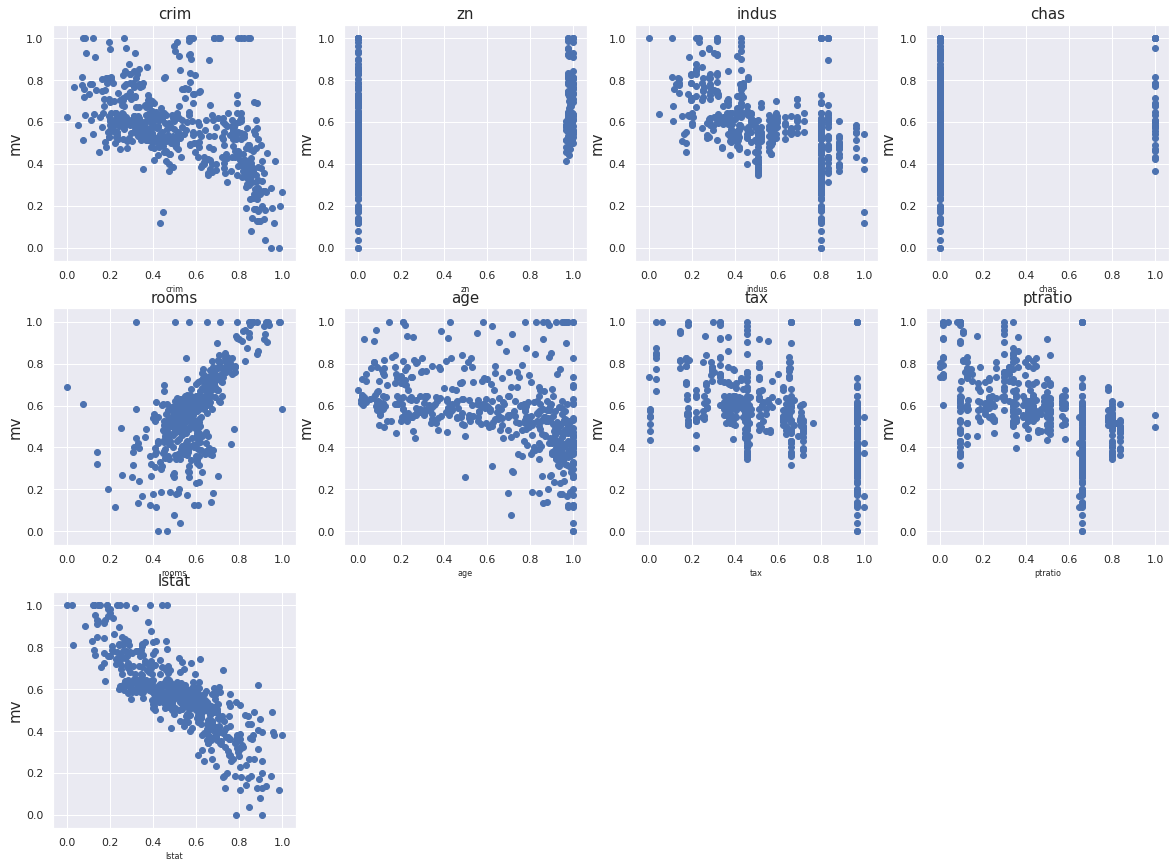

In [30]:
# Create multiple plots
features = boston_df5.drop('mv', 1).columns
target = boston_df5['mv']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(boston_df5[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('mv', fontsize=15)

The variables room and lstat look to have linear relationship with mv target variable

## Create Linear Regression Model

### Summary Statistics for Linear Regression Model - Statsmodel 

In [31]:
X = pd.DataFrame(np.c_[boston_df['crim']
,boston_df['indus']
,boston_df['rooms']
,boston_df['age']
,boston_df['tax']
,boston_df['ptratio']
,boston_df['lstat']])

In [32]:
Y = boston_Target['mv']

In [33]:
X=sm.add_constant(X)
model=sm.OLS(Y, X)

In [34]:
results=model.fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          3.38e-121
Time:                        15:01:34   Log-Likelihood:                -1545.7
No. Observations:                 506   AIC:                             3107.
Df Residuals:                     498   BIC:                             3141.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0459      3.985      4.278      0.0

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LinearRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
</div>

In [36]:
X = boston_df5[[ 'crim'
                 ,'indus'
                 ,'rooms'
                 ,'age'
                 ,'tax'
                 ,'ptratio'
                 ,'lstat']]
y = boston_Target.mv

#### Split Dataset into Training and Test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

#### Review Train and Testing 

In [38]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(339, 7)
(167, 7)
(339,)
(167,)


#### Create LinearRegression Instance

In [39]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

#### Linear Regression Model Actual Vs. Predicted Price Plot

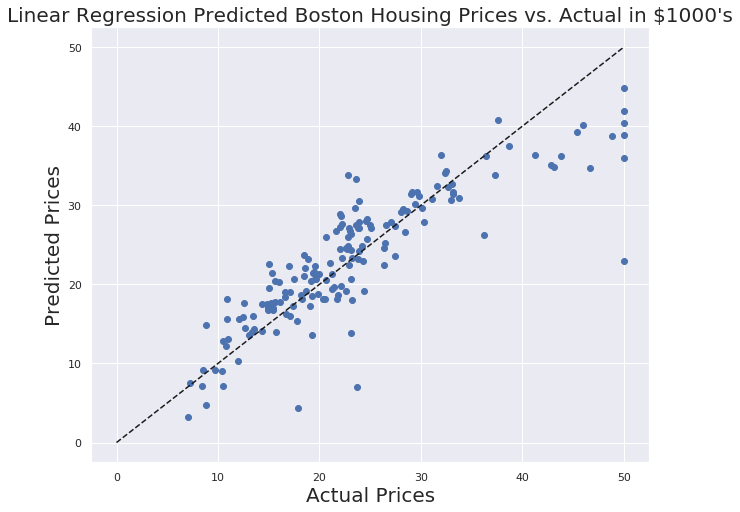

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_lrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [41]:
print("Linear Regression R_squared = ",lrm.score(X,y)) 
pred= lrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.738292920649591
Linear Regression RMSE =  4.6927106137712284


In [42]:
print(lrm.coef_)

[  2.8459  -0.6522  12.8928   4.7397  -4.5159  -5.7187 -31.4078]


In [43]:
print(lrm.intercept_)

32.533791803696886


## Create Random Forest Regressor

<div class="alert alert-block alert-success">
    <b>Random Forest</b>: is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree
</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.RandomForestRegressor</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
</div>

#### Create Random Forest Regressor 

In [44]:
Randreg = RandomForestRegressor()

# Fit data on to the model
Randreg.fit(X_train, y_train)

# Predict
y_predicted_Randreg = Randreg.predict(X_test)

#### Random Forest Regressor Model Actual Vs. Predicted Price Plot

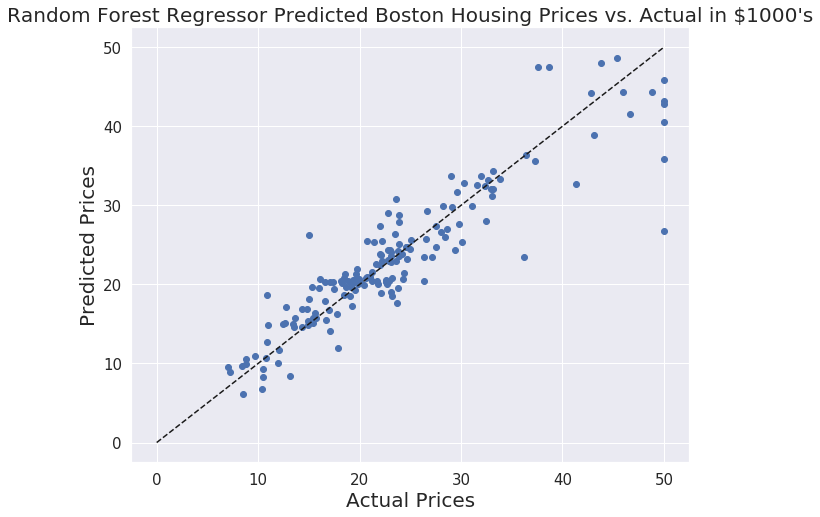

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_Randreg)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Random Forest Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [46]:
print("Random Forest Regressor R_squared = ",Randreg.score(X,y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Random Forest Regressor RMSE = ', rmse)

Random Forest Regressor R_squared =  0.9221887680412965
Random Forest Regressor RMSE =  2.5588049586096897


In [47]:
print(Randreg.decision_path(X))

(<506x40556 sparse matrix of type '<class 'numpy.longlong'>'
	with 542777 stored elements in Compressed Sparse Row format>, array([    0,   407,   798,  1213,  1618,  2011,  2426,  2831,  3224,
        3625,  4022,  4419,  4826,  5245,  5668,  6067,  6446,  6861,
        7264,  7665,  8068,  8481,  8878,  9297,  9718, 10111, 10506,
       10903, 11314, 11731, 12140, 12531, 12934, 13339, 13738, 14131,
       14522, 14935, 15332, 15745, 16148, 16549, 16970, 17379, 17778,
       18191, 18608, 18995, 19392, 19781, 20214, 20637, 21054, 21437,
       21846, 22251, 22660, 23077, 23496, 23889, 24306, 24719, 25114,
       25517, 25932, 26343, 26742, 27165, 27570, 27969, 28378, 28797,
       29186, 29605, 30022, 30413, 30810, 31207, 31618, 32041, 32444,
       32845, 33246, 33635, 34028, 34435, 34864, 35267, 35666, 36073,
       36460, 36883, 37282, 37699, 38096, 38503, 38924, 39335, 39744,
       40161, 40556]))


## Create Extra-Trees Regressor

<div class="alert alert-block alert-success">
    <b>Extra-Trees Regressor</b>: This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.ExtraTreesRegressor</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
</div>

In [48]:
ETreg = ExtraTreesRegressor()

# Fit data on to the model
ETreg.fit(X_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(X_test)

#### Extra-Trees Regressor Model Actual Vs. Predicted Price Plot

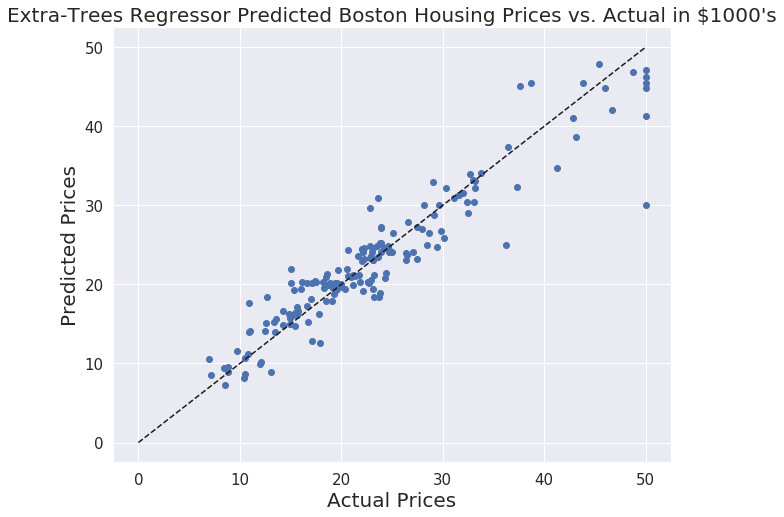

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_ETreg)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Extra-Trees Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [50]:
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Extra-Trees Regressor RMSE = ', rmse)

Extra-Trees Regressor R_squared =  0.9570610029956921
Extra-Trees Regressor RMSE =  1.9008243458236458


In [51]:
ETreg.feature_importances_

array([0.0509, 0.0528, 0.289 , 0.043 , 0.0446, 0.0652, 0.4546])

#### Create copy for Model Development 

In [52]:
model_data=boston_df6.values

#### Models (Linear Regression, Random Forest Regressor, Extra Trees Regressor)

In [53]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear Regression', 'Random Forest Regressor', 'Extra Trees Regressor']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              RandomForestRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED),
              ExtraTreesRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED)
            ]

### Random Search

In [54]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [55]:
cv_results_df.head(10)

,Linear Regression,Random Forest Regressor,Extra Trees Regressor
0,0.060632,0.077273,0.070920
1,0.064451,0.040420,0.039730
2,0.074057,0.061520,0.044329
3,0.075747,0.076915,0.090103
4,0.087041,0.063087,0.059333
5,0.095296,0.069287,0.061441
6,0.069371,0.057711,0.059902
7,0.207578,0.168768,0.158134
8,0.122983,0.118607,0.113409
9,0.120922,0.094154,0.085632


### Tuning Parameters with GridSearchCV

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.GridSearchCV</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

#### HyperParameter Search Random Forrest

In [56]:
param_grid = { 
            "n_estimators"      : [100,125,150],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [57]:
estimator = RandomForestRegressor()

In [58]:
grid = GridSearchCV(estimator, param_grid, cv=10)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j